### Step 1: Importing dependencies

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import os
import numpy as np

### Step 2: Load the data

In [2]:
processed_data_path = '../dataset/numerical_processed_patient_data.csv'
preprocessor_path = '../models/fitted_preprocessor.pkl'

In [3]:
# 1. Load the processed DataFrame
try:
    df = pd.read_csv(processed_data_path)
    print("Processed DataFrame loaded successfully!")
    print(df.head())
except FileNotFoundError:
    print(f"Error: Processed data CSV not found at {processed_data_path}")

# 2. Load the fitted preprocessor using pickle
try:
    with open(preprocessor_path, 'rb') as f: 
        loaded_preprocessor = pickle.load(f)
    print("\nFitted preprocessor loaded successfully!")
except FileNotFoundError:
    print(f"Error: Preprocessor not found at {preprocessor_path}")

Processed DataFrame loaded successfully!
   Age  Severity  Whendiagnoused  Systolic  Diastolic  Stages  Gender_Female  \
0  0.0       0.0             0.0       1.0        1.0     1.0            0.0   
1  0.0       0.0             0.0       1.0        1.0     1.0            1.0   
2  1.0       0.0             0.0       1.0        1.0     1.0            0.0   
3  1.0       0.0             0.0       1.0        1.0     1.0            1.0   
4  2.0       0.0             0.0       1.0        1.0     1.0            0.0   

   Gender_Male  History_No  History_Yes  ...  TakeMedication_No  \
0          1.0         0.0          1.0  ...                1.0   
1          0.0         0.0          1.0  ...                1.0   
2          1.0         0.0          1.0  ...                1.0   
3          0.0         0.0          1.0  ...                1.0   
4          1.0         0.0          1.0  ...                1.0   

   TakeMedication_Yes  BreathShortness_No  BreathShortness_Yes  \
0        

### Step 3: Reconstruct Original Categorical Columns

In [4]:
# Identify the exact column order used during preprocessing
ordinal_features = ['Age', 'Severity', 'Whendiagnoused',
                    'Systolic', 'Diastolic', 'Stages']
nominal_features = ['Gender', 'History', 'Patient', 'TakeMedication',
                    'BreathShortness', 'VisualChanges',
                    'NoseBleeding', 'ControlledDiet']

n_ord = len(ordinal_features)

# Split numeric matrix into ordinal and one-hot blocks
X_proc = df.to_numpy(dtype=float)
X_ord  = X_proc[:, :n_ord]          # first 6 columns    → OrdinalEncoder
X_nom  = X_proc[:, n_ord:]         # remaining columns  → OneHotEncoder

# Inverse-transform each block back to text labels
ord_encoder = loaded_preprocessor.named_transformers_['ord']
ohe_encoder = loaded_preprocessor.named_transformers_['ohe']

orig_ord = ord_encoder.inverse_transform(X_ord)
orig_nom = ohe_encoder.inverse_transform(X_nom)

# Re-assemble a fully “raw categorical” DataFrame
df_eda = pd.concat([
    pd.DataFrame(orig_ord, columns=ordinal_features, dtype='category'),
    pd.DataFrame(orig_nom, columns=nominal_features, dtype='category')
], axis=1)

print("\nRecovered categorical DataFrame (first 5 rows):")
display(df_eda.head())


Recovered categorical DataFrame (first 5 rows):


,Age,Severity,Whendiagnoused,Systolic,Diastolic,Stages,Gender,History,Patient,TakeMedication,BreathShortness,VisualChanges,NoseBleeding,ControlledDiet
0,18-34,Mild,<1 Year,111 - 120,81 - 90,HYPERTENSION (Stage-1),Male,Yes,No,No,No,No,No,No
1,18-34,Mild,<1 Year,111 - 120,81 - 90,HYPERTENSION (Stage-1),Female,Yes,No,No,No,No,No,No
2,35-50,Mild,<1 Year,111 - 120,81 - 90,HYPERTENSION (Stage-1),Male,Yes,No,No,No,No,No,No
3,35-50,Mild,<1 Year,111 - 120,81 - 90,HYPERTENSION (Stage-1),Female,Yes,No,No,No,No,No,No
4,51-64,Mild,<1 Year,111 - 120,81 - 90,HYPERTENSION (Stage-1),Male,Yes,No,No,No,No,No,No


### Step 4: Descriptive Statistical Analysis

In [5]:
print("Shape :", df_eda.shape)
display(df_eda.describe(include='all').T)

for col in df_eda.columns:
    print(f"\n----- {col} -----")
    display(df_eda[col].value_counts())

Shape : (1825, 14)


,count,unique,top,freq
Age,1825,4,51-64,475
Severity,1825,3,Moderate,697
Whendiagnoused,1825,3,<1 Year,625
Systolic,1825,4,111 - 120,1008
Diastolic,1825,5,81 - 90,708
Stages,1825,4,HYPERTENSION (Stage-1),648
Gender,1825,2,Female,913
History,1825,2,Yes,1657
Patient,1825,2,No,984
TakeMedication,1825,2,Yes,1081



----- Age -----


Age
51-64    475
18-34    474
35-50    474
65+      402
Name: count, dtype: int64


----- Severity -----


Severity
Moderate    697
Severe      576
Mild        552
Name: count, dtype: int64


----- Whendiagnoused -----


Whendiagnoused
<1 Year        625
>5 Years       624
1 - 5 Years    576
Name: count, dtype: int64


----- Systolic -----


Systolic
111 - 120    1008
121 - 130     577
130+          236
100+            4
Name: count, dtype: int64


----- Diastolic -----


Diastolic
81 - 90     708
91 - 100    540
70 - 80     336
100+        237
130+          4
Name: count, dtype: int64


----- Stages -----


Stages
HYPERTENSION (Stage-1)    648
HYPERTENSION (Stage-2)    600
NORMAL                    336
HYPERTENSIVE CRISIS       241
Name: count, dtype: int64


----- Gender -----


Gender
Female    913
Male      912
Name: count, dtype: int64


----- History -----


History
Yes    1657
No      168
Name: count, dtype: int64


----- Patient -----


Patient
No     984
Yes    841
Name: count, dtype: int64


----- TakeMedication -----


TakeMedication
Yes    1081
No      744
Name: count, dtype: int64


----- BreathShortness -----


BreathShortness
No     976
Yes    849
Name: count, dtype: int64


----- VisualChanges -----


VisualChanges
No     940
Yes    885
Name: count, dtype: int64


----- NoseBleeding -----


NoseBleeding
No     1380
Yes     445
Name: count, dtype: int64


----- ControlledDiet -----


ControlledDiet
No     984
Yes    841
Name: count, dtype: int64

### Step 5: Univariate Visual Analysis

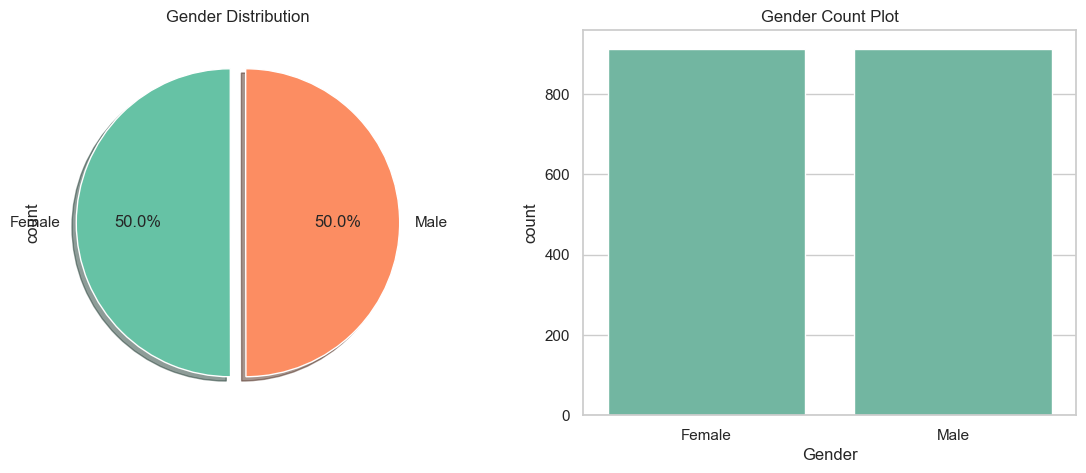

In [6]:
sns.set(style='whitegrid', palette='Set2')

# Gender distribution
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
df_eda['Gender'].value_counts().plot.pie(
    autopct='%1.1f%%', explode=[0.05]*df_eda['Gender'].nunique(),
    startangle=90, shadow=True)
plt.title('Gender Distribution')
plt.subplot(1,2,2)
sns.countplot(x='Gender', data=df_eda)
plt.title('Gender Count Plot')
plt.show()

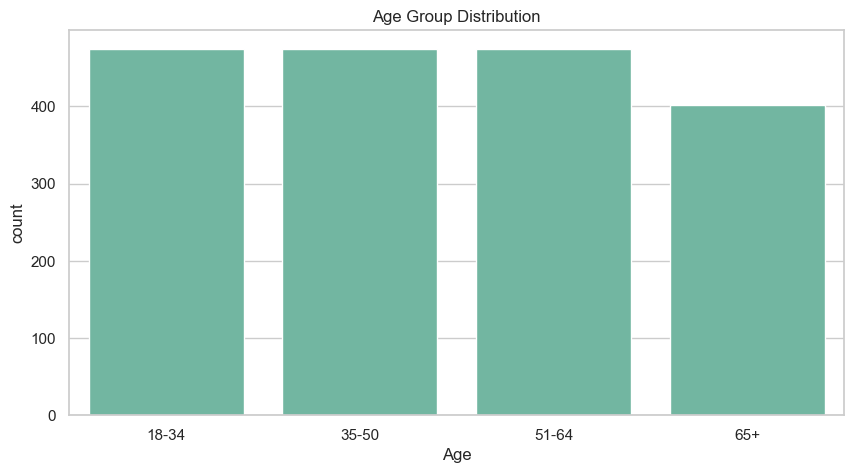

In [7]:
# Age-group distribution
plt.figure(figsize=(10,5))
sns.countplot(x='Age', data=df_eda, order=['18-34','35-50','51-64','65+'])
plt.title('Age Group Distribution')
plt.show()

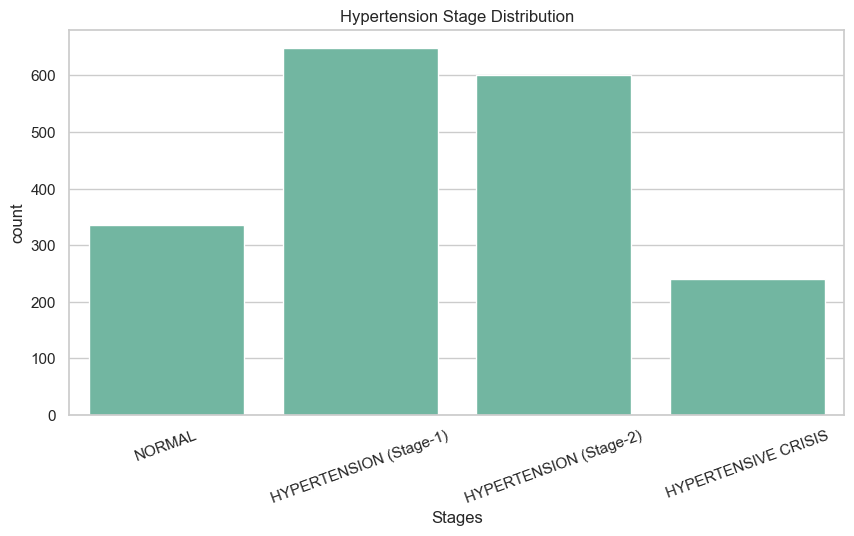

In [8]:
# Hypertension stages
plt.figure(figsize=(10,5))
sns.countplot(x='Stages', data=df_eda,
              order=['NORMAL','HYPERTENSION (Stage-1)',
                     'HYPERTENSION (Stage-2)','HYPERTENSIVE CRISIS'])
plt.xticks(rotation=20)
plt.title('Hypertension Stage Distribution')
plt.show()

### Step 6: Bivariate Visual Analysis


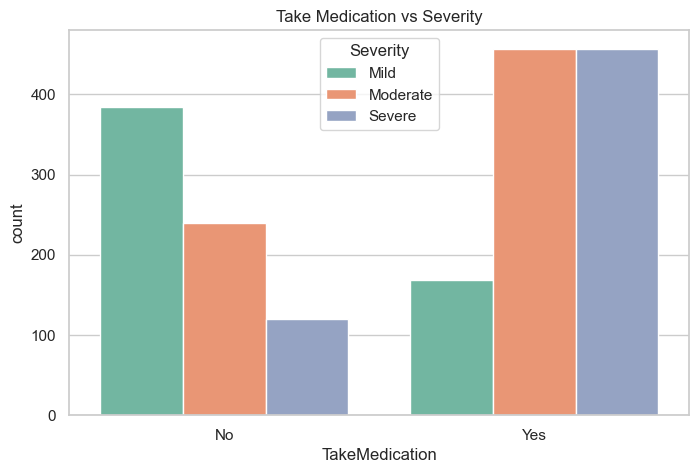

In [9]:
# Medication adherence vs Severity
plt.figure(figsize=(8,5))
sns.countplot(x='TakeMedication', hue='Severity', data=df_eda,
              order=['No','Yes'])
plt.title('Take Medication vs Severity')
plt.show()

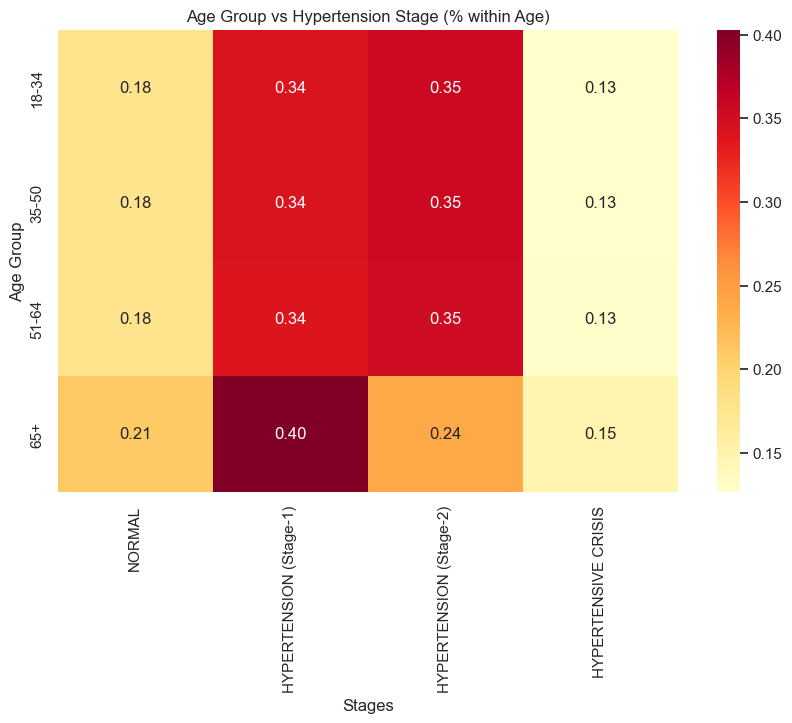

In [10]:
# Age group vs Hypertension stage
plt.figure(figsize=(10,6))
sns.heatmap(pd.crosstab(df_eda['Age'], df_eda['Stages'],
                        normalize='index').loc[
    ['18-34','35-50','51-64','65+'],
    ['NORMAL','HYPERTENSION (Stage-1)',
     'HYPERTENSION (Stage-2)','HYPERTENSIVE CRISIS']
], annot=True, fmt='.2f', cmap='YlOrRd')
plt.title('Age Group vs Hypertension Stage (% within Age)')
plt.ylabel('Age Group')
plt.show()

### Step 7: Multivariant Analysis

In [11]:
# Create numeric encodings for corr-matrix only
df_corr = df_eda.copy()
ord_map = {
    'Age': {'18-34':1, '35-50':2, '51-64':3, '65+':4},
    'Severity': {'Mild':1, 'Moderate':2, 'Severe':3},
    'Whendiagnoused': {'<1 Year':1, '1 - 5 Years':2, '>5 Years':3},
    'Systolic': {'100+':1, '111 - 120':2, '121 - 130':3, '130+':4},
    'Diastolic': {'70 - 80':1, '81 - 90':2, '91 - 100':3, '100+':4, '130+':5},
    'Stages': {'NORMAL':0, 'HYPERTENSION (Stage-1)':1,
               'HYPERTENSION (Stage-2)':2, 'HYPERTENSIVE CRISIS':3}
}
for col, mapping in ord_map.items():
    df_corr[col] = df_corr[col].map(mapping)

In [12]:
# binary yes/no → 0/1
yes_no_cols = ['History','Patient','TakeMedication',
               'BreathShortness','VisualChanges',
               'NoseBleeding','ControlledDiet']
df_corr[yes_no_cols] = (df_corr[yes_no_cols] == 'Yes').astype(int)
df_corr['Gender'] = (df_corr['Gender'] == 'Male').astype(int)

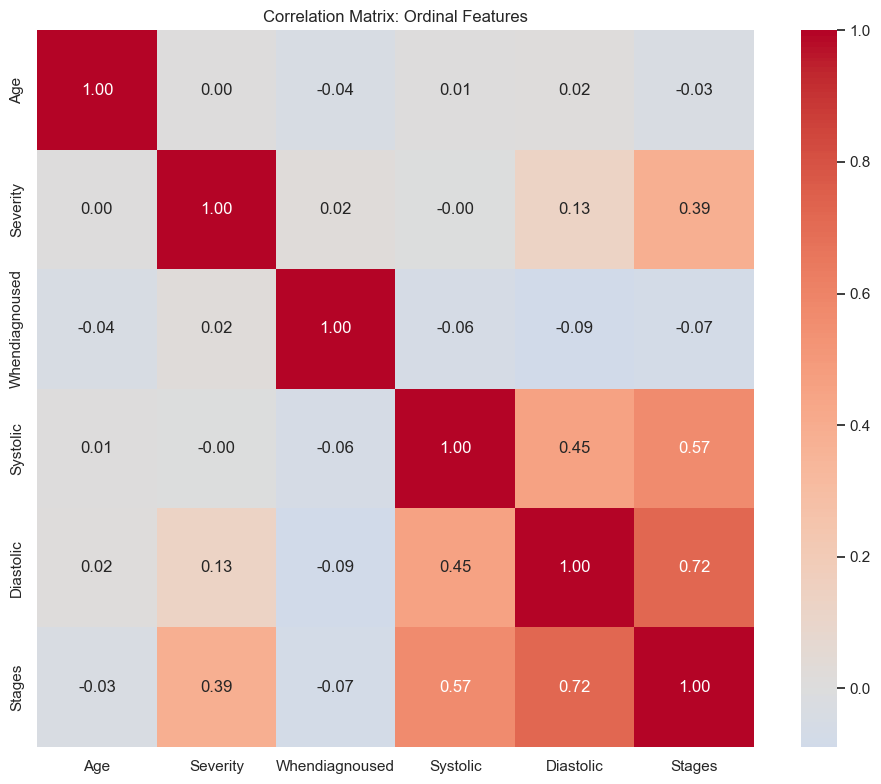

In [13]:
plt.figure(figsize=(10, 8))
ordinal_cols = ['Age', 'Severity', 'Whendiagnoused', 'Systolic', 'Diastolic', 'Stages']
correlation_matrix = df[ordinal_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            fmt='.2f', square=True)
plt.title('Correlation Matrix: Ordinal Features')
plt.tight_layout()
plt.show()

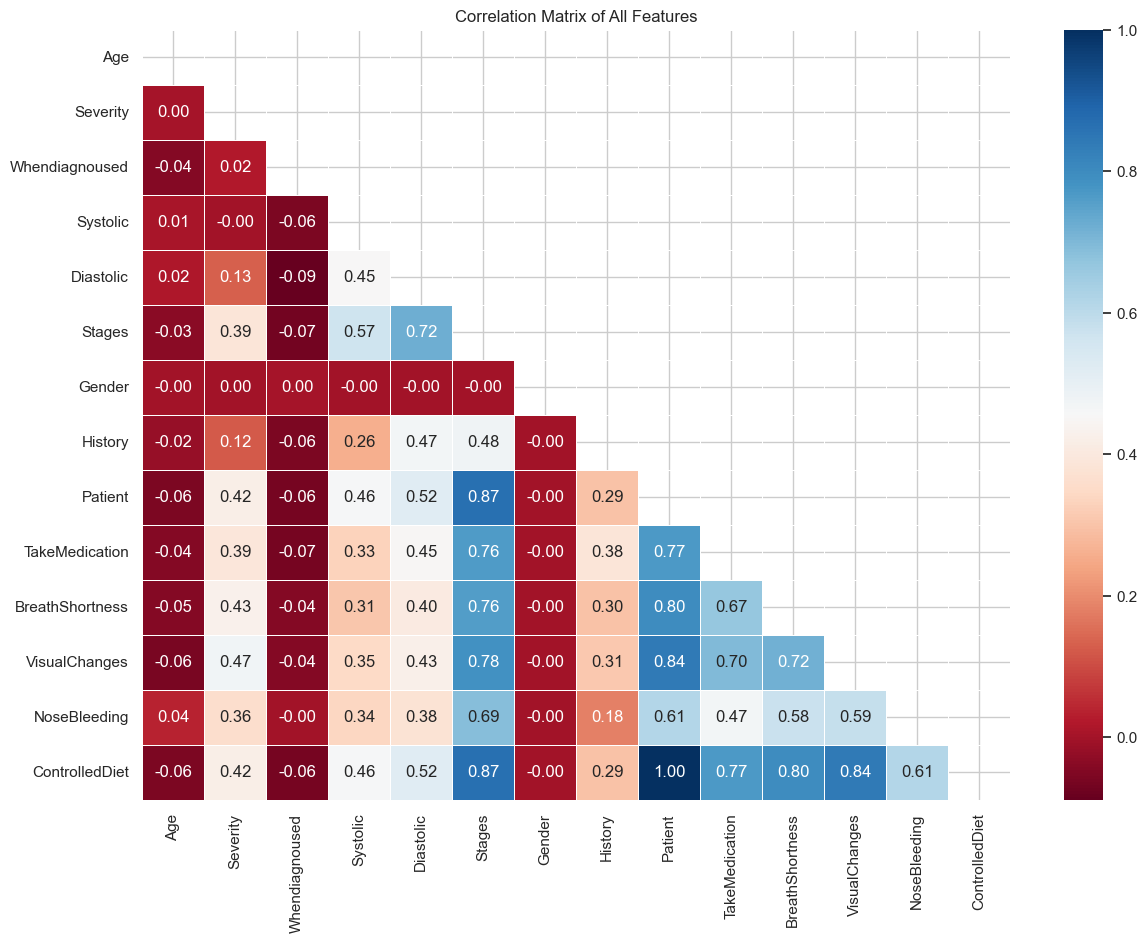

In [14]:
# Correlation heatmap
plt.figure(figsize=(14,10))
mask = np.triu(np.ones_like(df_corr.corr(), dtype=bool))
sns.heatmap(df_corr.corr(), mask=mask, annot=True, cmap='RdBu',
            fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix of All Features')
plt.show()

<Figure size 1200x1000 with 0 Axes>

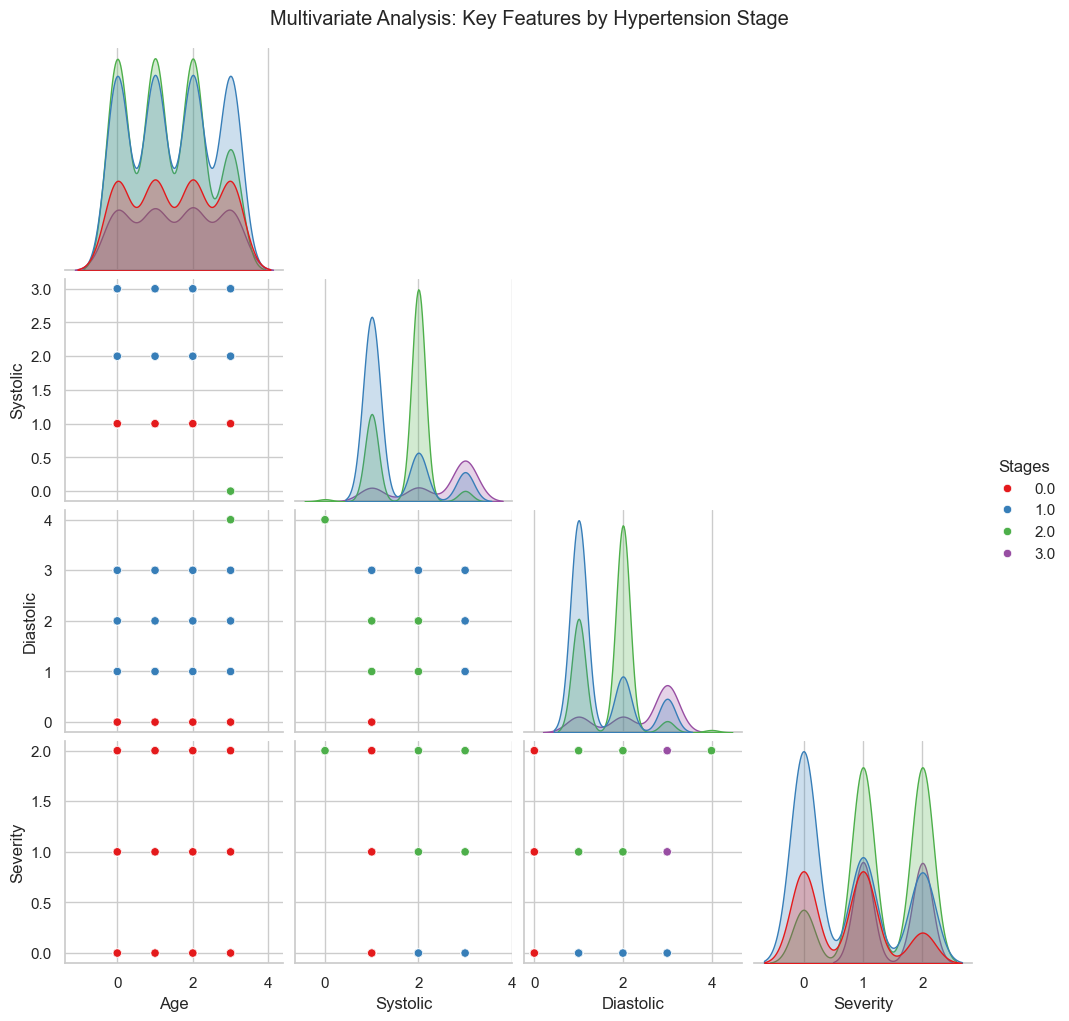

In [15]:
# Pairplot
plt.figure(figsize=(12, 10))
key_features = ['Age', 'Systolic', 'Diastolic', 'Severity', 'Stages']
sns.pairplot(df[key_features], hue='Stages', corner=True, palette='Set1')
plt.suptitle('Multivariate Analysis: Key Features by Hypertension Stage', y=1.02)
plt.show()


In [16]:
# Feature relationships with target (Stages)
print("Correlation with Hypertension Stages:")
stage_correlations = df[ordinal_cols].corr()['Stages'].sort_values(ascending=False)
for feature, corr in stage_correlations.items():
    if feature != 'Stages':
        print(f"{feature}: {corr:.3f}")

Correlation with Hypertension Stages:
Diastolic: 0.723
Systolic: 0.568
Severity: 0.386
Age: -0.034
Whendiagnoused: -0.069


In [17]:
categorical_output_path = '../dataset/categorical_processed_patient_data.csv'
df_eda.to_csv(categorical_output_path, index=False)
print(f"Recovered categorical view saved to: {categorical_output_path}")

Recovered categorical view saved to: ../dataset/categorical_processed_patient_data.csv
